# DAT210x - Programming with Python for DS

## Module4- Lab1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every `100` samples in the dataset, we save `1`. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [3]:
reduce_factor = 100

Load up the scanned armadillo:

In [5]:
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})
armadillo

,x,y,z
0,27.283239,5.894578,11.788401
1,-56.153477,-54.866692,66.677132
2,-55.619434,-55.855236,67.534760
3,28.784435,23.476126,-31.522230
4,-54.396542,-49.803776,75.316780
5,24.620844,-25.837965,51.668484
6,37.757702,7.324571,65.390671
7,29.567734,-9.542875,19.078310
8,27.466061,6.586442,12.646039
9,10.742151,-41.658661,-23.803507


### PCA

In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in `armadillo` dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

**NOTE-1**: Be sure to RETURN your projected armadillo rather than `None`! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

**NOTE-2**: Regarding the `svd_solver` parameter, simply pass that into your PCA model constructor as-is, e.g. `svd_solver=svd_solver`.

For additional details, please read through [Decomposition - PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [36]:
def do_PCA(df,svd):
    # .. your code here ..
    import numpy as np
    from sklearn.decomposition import PCA
    import pandas as pd
    df.fillna(0,inplace=True)
    #df=df.transpose()

    pca = PCA(n_components=2,svd_solver=svd)
    print('Dimension of old data : ' + str(df.shape))
    pca.fit(df)
    T=pca.transform(df)
    print('Dimension of new data : ' + str(T.shape))
    return T

### Preview the Data

<IPython.core.display.Javascript object>


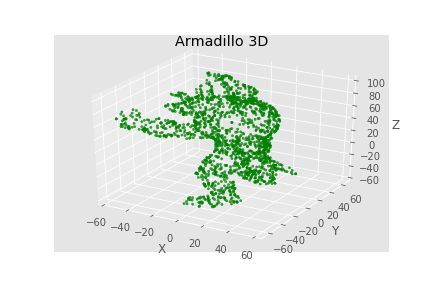

In [53]:
# Render the Original Armadillo
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

### Time Execution Speeds

Let's see how long it takes PCA to execute:

In [50]:
#%timeit
pca = do_PCA(armadillo, 'full')


Dimension of old data : (1730, 3)
Dimension of new data : (1730, 2)


Render the newly transformed PCA armadillo!

<IPython.core.display.Javascript object>


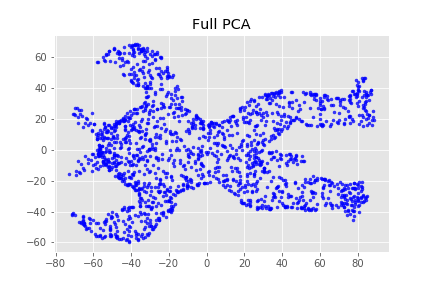

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Full PCA')
ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)
plt.show()

Let's also take a look at the speed of the randomized solver on the same dataset. It might be faster, it might be slower, or it might take exactly the same amount of time to execute:

In [49]:
#%timeit 
rpca = do_PCA(armadillo, 'randomized')

Dimension of old data : (1730, 3)
Dimension of new data : (1730, 2)


Let's see what the results look like:

<IPython.core.display.Javascript object>


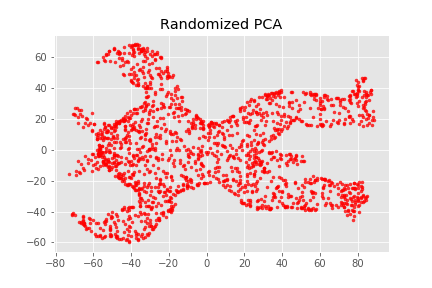

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Randomized PCA')
ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)
plt.show()